# 4 Flows on the Circle
---

**Overview**

- [4.0 Introduction](#4.0-Introduction)
- [4.1 Examples and Definitions](#4.1-Examples-and-Definitions)
    - [Example 4.1.1](#Example-4.1.1)
    - [Example 4.1.2](#Example-4.1.2)
- [4.2 Uniform Oscillator](#4.2-Uniform-Oscillator)

---

In [2]:
import matplotlib.pyplot as plt
import numpy as np

c = ['#1f77b4', 
     '#ff7f0e', 
     '#2ca02c', 
     '#d62728', 
     '#9467bd', 
     '#8c564b', 
     '#e377c2', 
     '#7f7f7f', 
     '#bcbd22', 
     '#17becf']

l = ['-', '--', '-.', ':']
m = ['o', 'x', 's']

## 4.0 Introduction
---

$$\dot{\theta} = f(\theta)$$

**vector field on the circle**


## 4.1 Examples and Definitions
---

### Example 4.1.1

$$\dot{\theta} = \sin\theta$$

*Solution:*



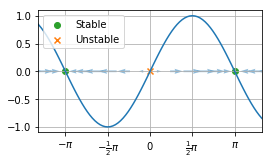

In [7]:
def theta_dot(theta):
    theta_ = np.sin(theta)
    return theta_

pi = np.pi
theta = np.linspace(-pi*3/2, pi*3/2, 100)
flow = np.linspace(-pi*3/2, pi*3/2, 20)

#ax = plt.subplot(111, projection='polar')
#ax.plot(theta, r)
#ax.set_rmax(2)
#ax.set_rticks([0.5, 1, 1.5, 2])  # less radial ticks
#ax.set_rlabel_position(-22.5)  # get radial labels away from plotted line

#ax.quiver(theta, 0, theta_dot(theta), 0)
#ax.grid(True)

plt.figure(figsize=(4, 2.25))
plt.plot(theta, theta_dot(theta))
plt.quiver(flow, 0, theta_dot(flow), 0, color=c[0], alpha=.5)
plt.scatter(np.array([-pi, pi]), np.array([0, 0]), c=c[2], marker=m[0], label='Stable')
plt.scatter(0, 0, c=c[1], marker=m[1], label='Unstable')

plt.xlim(-pi-1, pi+1)
plt.xticks([-pi, -pi/2, 0, pi/2, pi], 
           [r'$-\pi$', r'$-\frac{1}{2}\pi$', r'$0$', r'$\frac{1}{2}\pi$', r'$\pi$'])
plt.legend(loc='best')
plt.grid(True)
plt.show()

### Example 4.1.2

$$\dot{\theta} = \theta$$

*Solution:*



## 4.2 Uniform Oscillator
---

$$\dot{\theta} = \omega$$

$$\theta(t) = \omega t + \theta_0$$

- $\omega$: angular freq
- $T$: period $T = \frac{2\pi}{\omega}$



### Example 4.2.1

- Speedy$T_1$ sec/track
- Pokey $T_2$ sec/track ($T_2 > T_1$)

*Solution:*

let 

- $\theta_1(t)$: Speedy position
- $\theta_2(t)$: Pokey position

$\dot{\theta_1} = \omega_1$
where $\omega_1 = \frac{2\pi}{T_1}$

def **phase difference**,  
$\phi := \theta_1 - \theta_2$

By subtraction,
$\dot{\phi} = \dot{\theta_1} - \dot{\theta_2} = \omega_1 - \omega_2$

$\phi$ increases by $2\pi$ after a time
$$\begin{align*}
T_{lap} &= \frac{2\pi}{\omega_1 - \omega_2} \\
&= \Big( \frac{1}{T_1} - \frac{1}{T_2} \Big) ^{-1}
\end{align*}$$


**beat phenomenon**

## 4.3 Nonuniform Oscillator
---

$$\begin{align*}
\dot{\theta} = \omega - a \sin \theta
& \quad\quad (4.3.1)
\end{align*}$$

- Electronics (phase-locked loops)
- Biology (oscillating neurons, firefly flashing, human sleep-wake cycle)
- Condensed-matter physics (Jasphson junction, charge-density waves)
- Mechanics (Overdamped pendulum driven by a constant torque)



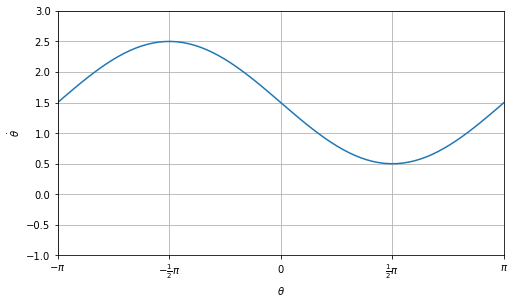

In [14]:
# constant
omega, a = 1.5, 1  

def theta_dot(theta, omega, a):
    theta_ = omega - a*np.sin(theta)
    return theta_

pi = np.pi
theta = np.linspace(-pi-1, pi+1, 100)

plt.figure(figsize=(8, 4.5))

plt.plot(theta, theta_dot(theta, omega, a), c=c[0], linestyle=l[0])
plt.xticks([-pi, -pi/2, 0, pi/2, pi], 
           [r'$-\pi$', r'$-\frac{1}{2}\pi$', r'$0$', r'$\frac{1}{2}\pi$', r'$\pi$'])
plt.xlim(-pi, pi)
plt.ylim(-1, 3)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\dot{\theta}$')
plt.grid(True)
plt.show()

### Vector Fields

**bottle neck**


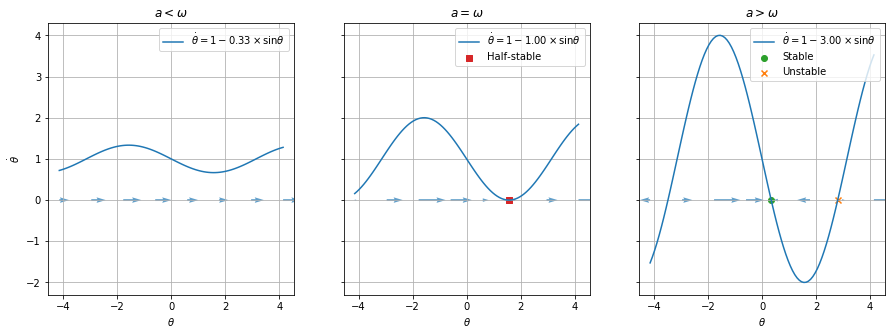

In [35]:
def theta_dot(theta, omega, a):
    theta_ = omega - a*np.sin(theta)
    return theta_

pi = np.pi
theta = np.linspace(-pi-1, pi+1, 100)
flow = np.linspace(-pi-1, pi+1, 8)

omegas, aa = np.repeat(1, 3), np.array([1/3, 1, 3])
titles = np.array([r'$a < \omega$', r'$a = \omega$', r'$a > \omega$'])

fig, axes = plt.subplots(ncols=3, sharex=True, sharey=True, figsize=(15, 5))

for ax, omega, a, title in zip(axes, omegas, aa, titles):
    ax.plot(theta, theta_dot(theta, omega, a), c=c[0], linestyle=l[0], label=(r'$\dot{\theta} = 1 - %.2f \times \sin\theta$' % a))
    ax.quiver(flow, 0, theta_dot(flow, omega, a), 0, color=c[0], alpha=.7)
    
    if a == omega:
        ax.scatter(pi/2, theta_dot(pi/2, omega, a), c=c[3], marker=m[2], label='Half-stable')
    elif a > omega:
        ax.scatter(np.arcsin(omega/a), 0, c=c[2], marker=m[0], label='Stable')
        ax.scatter(pi-np.arcsin(omega/a), 0, c=c[1], marker=m[1], label='Unstable')
    
#     ax.xticks([-pi, -pi/2, 0, pi/2, pi], 
#            [r'$-\pi$', r'$-\frac{1}{2}\pi$', r'$0$', r'$\frac{1}{2}\pi$', r'$\pi$'])
    ax.set(xlabel=r'$\theta$', title=title)
    ax.legend(loc='best')
    ax.grid(True)
    
axes[0].set(ylabel=r'$\dot{\theta}$')
# plt.xticks([-pi, -pi/2, 0, pi/2, pi], 
#            [r'$-\pi$', r'$-\frac{1}{2}\pi$', r'$0$', r'$\frac{1}{2}\pi$', r'$\pi$'])
# plt.xlim(-pi, pi)
# plt.ylim(-1, 3)
# plt.xlabel(r'$\theta$')
# plt.ylabel(r'$\dot{\theta}$')

plt.show()

### Example 4.3.1

linear stability analysis (4.3.1)

*Solution:*

fixed points $\theta*$

$$\sin\theta* = \frac{\omega}{a} \quad 
\cos\theta* = ±\sqrt{1 - \Big( \frac{\omega}{a} \Big)^2}$$

---
**Overview**

- [4.0 Introduction](#4.0-Introduction)
- [4.1 Examples and Definitions](#4.1-Examples-and-Definitions)
    - [Example 4.1.1](#Example-4.1.1)
    - [Example 4.1.2](#Example-4.1.2)
- [4.2 Uniform Oscillator](#4.2-Uniform-Oscillator)
    - [Example 4.2.1](#Example-4.2.1)
- [4.3 Nonuniform Oscillator](#4.3-Nonuniform-Oscillator)
    - [Example 4.3.1](#Example-4.3.1)